In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython

from pathlib import Path

import soundfile as sf
import pyloudnorm as pyln

from see import filter, OE, envelope

In [ ]:
###########################
### TEST PROCESS SCRIPT ###
###########################

ROOT = Path("~").expanduser() / 'Documents' / 'Python' / 'SEE'
WAV_PATH = Path("~").expanduser() / 'Audio'
REF_PATH = WAV_PATH / 'Speech_Samples' / 'clarity' 
SPIN_PATH = WAV_PATH / 'SEE_output' / 'processed' / 'OE_grid_search' / 'SPiN'
FRAME_PATH = ROOT / 'data' / 'frames'
OUT_PATH = WAV_PATH / 'SEE_output'
SPiN_PATH = OUT_PATH / 'SPiN'

fname = 'Stim_1'

f_low = 185.0
f_high = 8000
n_bands = 22
LUFS = -23.0


data, fs = sf.read(REF_PATH  / f'{fname}.wav')


while True:
    try:
        data = np.sum(data, axis=1) / 2
        break
    except :
        print('Mono .wav, no summing required')
        break

meter = pyln.Meter(fs)
loudness = meter.integrated_loudness(data)
data = pyln.normalize.loudness(data, loudness, LUFS)
data_peak = pyln.normalize.peak(data, -1.0)

input_env = envelope.get_smooth_env(data)


Mono .wav, no summing required


In [8]:
def normalize_output(data, reference_loudness, meter):

    output_loudness = meter.integrated_loudness(data)
    normal_output = pyln.normalize.loudness(data, output_loudness, reference_loudness)

    return normal_output


In [9]:
cf = filter.ERB_cf(f_low, f_high, n=n_bands)
x_over_freqs = filter.ERB_x_over(f_high, f_low, n_bands)

#meter = pyln.Meter(fs)
#loudness = meter.integrated_loudness(data)

filtered = filter.LWR_filterbank(data, x_over_freqs, fs)
reconstructed = filter.reconstruct_signal(filtered)
recon_norm = normalize_output(reconstructed, loudness, meter)
#sf.write(OUT_PATH  / 'test' / f'{fname}_adjust_FB_reconstruct_test.wav', recon_norm, fs)

In [5]:
list(itertools.product(FNAMES, cutoffs, s_boosts, p_boosts, frame_sizes, env_types))

[('S08955_target', 16, 1.2, 2.0, 128, 'smooth'),
 ('S08955_target', 16, 1.2, 4.0, 128, 'smooth'),
 ('S08955_target', 16, 4.0, 2.0, 128, 'smooth'),
 ('S08955_target', 16, 4.0, 4.0, 128, 'smooth'),
 ('S08955_target', 20.0, 1.2, 2.0, 128, 'smooth'),
 ('S08955_target', 20.0, 1.2, 4.0, 128, 'smooth'),
 ('S08955_target', 20.0, 4.0, 2.0, 128, 'smooth'),
 ('S08955_target', 20.0, 4.0, 4.0, 128, 'smooth'),
 ('S09240_target', 16, 1.2, 2.0, 128, 'smooth'),
 ('S09240_target', 16, 1.2, 4.0, 128, 'smooth'),
 ('S09240_target', 16, 4.0, 2.0, 128, 'smooth'),
 ('S09240_target', 16, 4.0, 4.0, 128, 'smooth'),
 ('S09240_target', 20.0, 1.2, 2.0, 128, 'smooth'),
 ('S09240_target', 20.0, 1.2, 4.0, 128, 'smooth'),
 ('S09240_target', 20.0, 4.0, 2.0, 128, 'smooth'),
 ('S09240_target', 20.0, 4.0, 4.0, 128, 'smooth'),
 ('S08873_target', 16, 1.2, 2.0, 128, 'smooth'),
 ('S08873_target', 16, 1.2, 4.0, 128, 'smooth'),
 ('S08873_target', 16, 4.0, 2.0, 128, 'smooth'),
 ('S08873_target', 16, 4.0, 4.0, 128, 'smooth'),
 ('S

In [20]:
cutoff = 20.0
slow_boost = 1.2
peak_boost = 2.0
fast_cutoff = 375.0
env_type = 'smooth'
frame_size = 128
peak = 'ratio'

OE_out = OE.OE(data, fs, f_low, f_high, cutoff, slow_boost, peak, peak_boost, fast_cutoff, n_bands, frame_size, env_type)
OE_norm = normalize_output(OE_out, -23.0, meter)
OE_peak = pyln.normalize.peak(OE_out, -1.0)
#sf.write(OUT_PATH / 'test' / f'{fname}_new_OE_LL_TEST_cut-{cutoff}_slowB-{slow_boost}_peak-{peak}_peakB-{peak_boost}_fastCut-{fast_cutoff}_env-{env_type}_frame-{frame_size}.wav', OE_norm, fs)
OE_env = envelope.get_smooth_env(OE_norm)
IPython.display.Audio(OE_peak, rate=fs)

In [16]:
# Peak normalized UP
IPython.display.Audio(data_peak, rate=fs)

In [23]:
# Loudness Normalised OE
IPython.display.Audio(OE_norm, rate=fs)

In [22]:
# Loudness normalized UP
IPython.display.Audio(data, rate=fs)

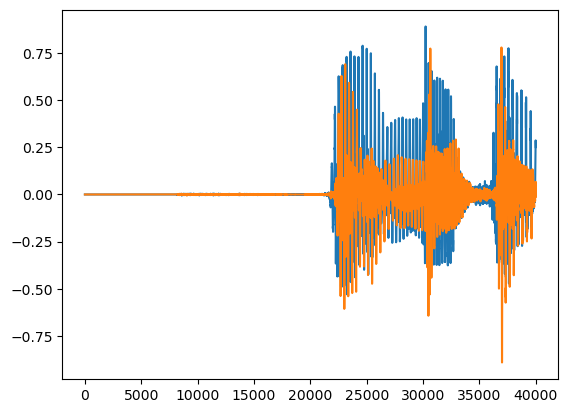

In [21]:
tstart = 80000
tstop = 120000


plt.plot(data_peak[tstart:tstop])
plt.plot(OE_peak[tstart:tstop])



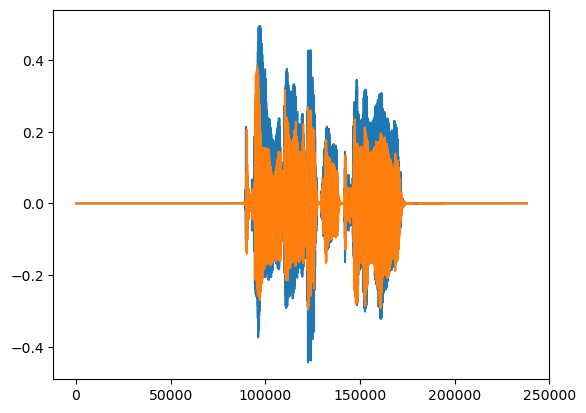

In [6]:
tstart = 78000
tstop = 160000

plt.plot(data)
plt.plot(OE_norm)

In [7]:
f_low = 100
f_high = 8000
n = 24

erb_low = filter.Hz_to_ERB(f_low)
erb_high = filter.Hz_to_ERB(f_high)
erb_cf = np.linspace(erb_low, erb_high, n + 1)
x_over = [filter.ERB_to_Hz(erb) for erb in erb_cf]

In [32]:
from scipy.signal import lfilter

cf = filter.ERB_cf(f_low, f_high, n=n_bands)
x_over_freqs = filter.ERB_x_over(f_low, f_high, n_bands)

meter = pyln.Meter(fs)
loudness = meter.integrated_loudness(data)

filtered = filter.LWR_filterbank(data, x_over_freqs, fs)

In [8]:
filtered.shape

(23, 5760000)

In [13]:
OE_bands = np.zeros_like(filtered)

for i, x in enumerate(filtered):

    OE_bands[i] = x

OE_bands.shape

(24, 5760000)

In [10]:
OE_bands = []
process_low = False
process_high = False

for i, band in enumerate(filtered):

    if i == 0 and process_low == False:
        y = band

    elif i == len(filtered)-1 and process_high == False:
        y = band

    else:
        y = OE.apply_OE(band, fs, cutoff, slow_boost, peak, peak_boost, fast_cutoff, frame_size, env_type)

    OE_bands.append(y)

In [12]:
OE_bands[0]

array([-3.34034206e-18,  2.77977810e-17, -8.17811262e-17, ...,
       -1.27866910e-05, -1.27917297e-05, -1.27979967e-05],
      shape=(5760000,))

In [13]:
enhanced = filter.reconstruct_signal(np.array(OE_bands))

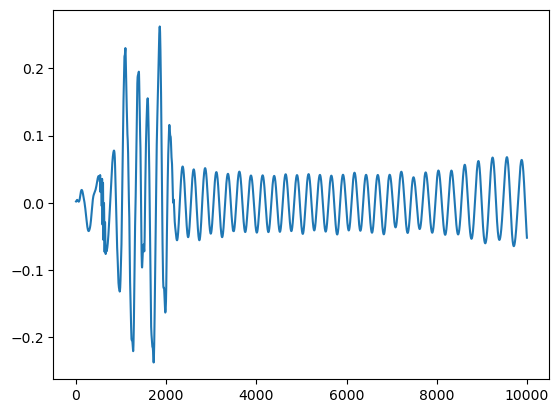

In [15]:
plt.plot(enhanced[100000:110000])

In [76]:
fast_cutoff = 375.0

cutoff_A = 20.0
slow_boost_A = 4.0
peak_boost_A = 4.0

cutoff_B = 16.0
slow_boost_B = 1.2
peak_boost_B = 2.0

epsilon = 1e-6
signal = filtered[1]
peak = 'ratio'

env = envelope.get_envelope(signal)
env_smooth = envelope.get_smooth_env(signal, frame_size=256) + epsilon
env_sph = envelope.get_peak_hold(signal, frame_size=128)

env_fast = filter.filter_data(data=env_smooth, 
                        filter_type='lowpass', 
                        cutoff=fast_cutoff, 
                        fs=fs, 
                        Q=0.707
)

env_slow_A = filter.filter_data(data=env_smooth, 
                        filter_type='lowpass', 
                        cutoff=cutoff_A, 
                        fs=fs, 
                        Q=0.707
)

env_slow_B = filter.filter_data(data=env_smooth, 
                        filter_type='lowpass', 
                        cutoff=cutoff_B, 
                        fs=fs, 
                        Q=0.707
)

env_SB_A = env_slow_A * slow_boost_A
env_peak_A = (env_smooth - (env_SB_A)) * peak_boost_A
env_peak_A = np.clip(env_peak_A, 0.0, None)
env_enhanced_A = env_peak_A + env_smooth

env_SB_B = env_slow_B * slow_boost_B
env_peak_B = (env_smooth - (env_SB_B)) * peak_boost_B
env_peak_B = np.clip(env_peak_B, 0.0, None)
env_enhanced_B = env_peak_B + env_smooth

gain_A = env_enhanced_A / (env_smooth + epsilon)
gain_B = env_enhanced_B / (env_smooth + epsilon)

signal_hanced_A = signal * gain_A
signal_hanced_B = signal * gain_B

sig_A = normalize_output(signal_hanced_A, LUFS, meter)
sig_B = normalize_output(signal_hanced_B, LUFS, meter)

coded = OE.apply_OE(signal, fs, cutoff, slow_boost, peak, 4.0, 375.0, 128, 'smooth')

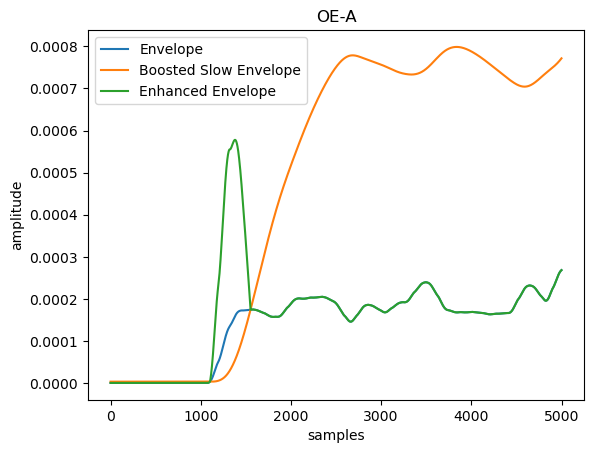

In [68]:
tstart = 87000
tstop = 92000

#plt.plot(env[tstart:tstop])
plt.plot(env_smooth[tstart:tstop], label='Envelope')
#plt.plot(env_slow[tstart:tstop], label='Slow Envelope')

plt.plot(env_SB_A[tstart:tstop], label='Boosted Slow Envelope')
plt.plot(env_enhanced_A[tstart:tstop], label='Enhanced Envelope')


plt.title('OE-A')
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.legend()


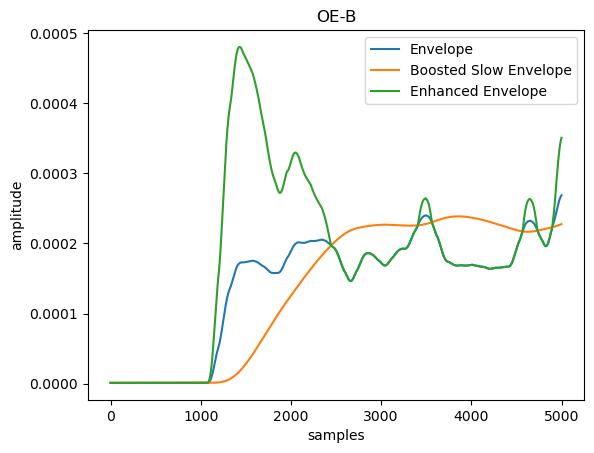

In [82]:
tstart = 87000
tstop = 92000

#plt.plot(env[tstart:tstop])
plt.plot(env_smooth[tstart:tstop], label='Envelope')
#plt.plot(env_slow[tstart:tstop], label='Slow Envelope')

plt.plot(env_SB_B[tstart:tstop], label='Boosted Slow Envelope')
plt.plot(env_enhanced_B[tstart:tstop], label='Enhanced Envelope')


plt.title('OE-B')
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.legend()


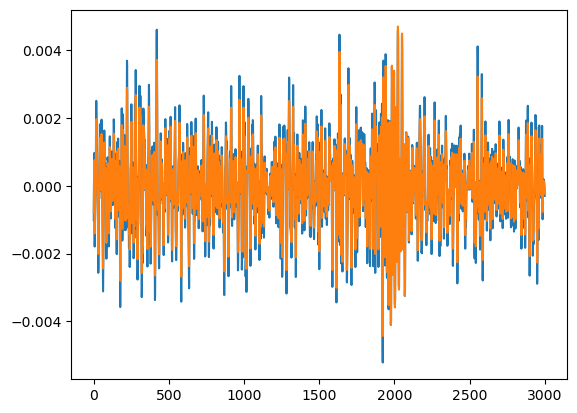

In [81]:
tstart = 90000
tstop = 93000

plt.plot(sig_A[tstart:tstop])
plt.plot(sig_B[tstart:tstop])



#plt.plot(signal_hanced_B)
#plt.plot(signal_hanced_A)


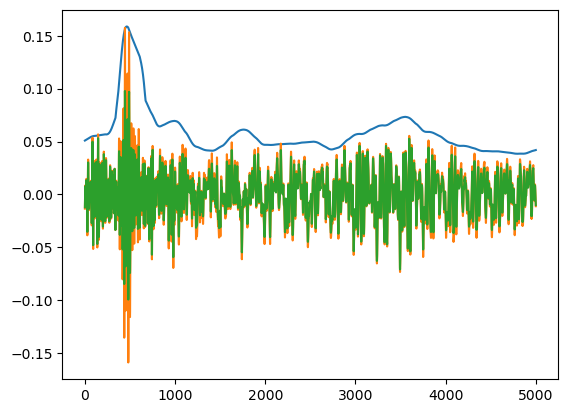

In [11]:


#plt.plot(signal[tstart:tstop])

#plt.plot(env_fast[tstart:tstop])
#plt.plot(env_smooth[tstart:tstop])
#plt.plot(env_SB[tstart:tstop])
#plt.plot(env_peak[tstart:tstop])

#plt.plot(gain[tstart:tstop])
#plt.plot(quick_gain[tstart:tstop])
plt.plot(env_enhanced[tstart:tstop])


#plt.plot(env_smooth[tstart:tstop])

plt.plot(signal_hanced[tstart:tstop])
plt.plot(quick_hanced[tstart:tstop])

#plt.plot(signal[tstart:tstop])
#plt.plot(coded[tstart:tstop])


In [9]:
def log_limit(array):

    log_array = 2*np.log10(1+(array)/4)

    return log_array

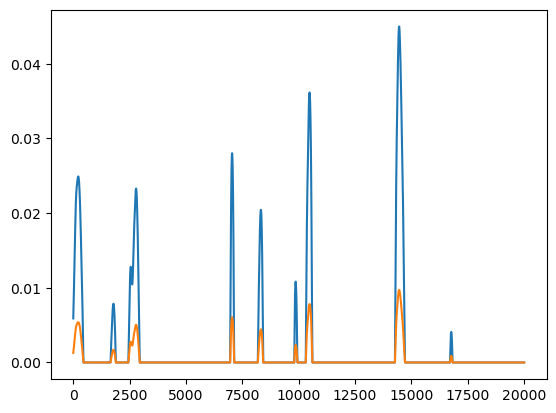

In [26]:
tstart = 90000
tstop = 110000
plt.plot(env_peak[tstart:tstop])
plt.plot(log_limit(env_peak[tstart:tstop]))

In [ ]:
from scipy.signal import lfilter

cf = filter.ERB_cf(f_low, f_high, n=n_bands)
x_over_freqs = filter.ERB_x_over(f_high, f_low, n_bands)

meter = pyln.Meter(fs)
loudness = meter.integrated_loudness(data)

# Calculate coefficients for Linkwitz Riley filters for allpass cross over filterbank
LP_coefs, AP_coefs = filter.LWR_crossover_coefs(x_over_freqs, fs)

filtered = filter.LWR_filterbank(data, x_over_freqs, fs)
reconstructed = filter.reconstruct_signal(filtered)
recon_norm = normalize_output(reconstructed, loudness, meter)
sf.write(OUT_PATH  / 'test' / f'{fname}_OE_FB_reconstruct_test.wav', recon_norm, fs)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (24,) + inhomogeneous part.

In [7]:
from scipy.signal import lfilter

cf = filter.ERB_cf(f_low, f_high, n=n_bands)
x_over_freqs = filter.ERB_x_over(f_high, f_low, n_bands)

meter = pyln.Meter(fs)
loudness = meter.integrated_loudness(data)

# Calculate coefficients for Linkwitz Riley filters for allpass cross over filterbank
LP_coefs, AP_coefs = filter.LWR_crossover_coefs(x_over_freqs, fs)

if len(data.shape)==1:
    X = [data]
else:
    X = [data[:,x] for x in range(data.shape[1])]

high_data = X

channels = []

In [8]:


channels = []

for lp_coef, ap_coef in zip(LP_coefs, AP_coefs):

    lp_b = lp_coef[0]
    lp_a = lp_coef[1]

    ap_b = ap_coef[0]
    ap_a = ap_coef[1]

    #low_data = lfilter(lp_b, lp_a, lfilter(lp_b, lp_a, high_data))
    #high_data = lfilter(ap_b, ap_a, lfilter(ap_b, ap_a, high_data))

    low_data = lfilter(lp_b, lp_a, high_data)
    low_data = lfilter(lp_b, lp_a, low_data) 
    high_data = lfilter(ap_b, ap_a, high_data)
    high_data = lfilter(ap_b, ap_a, high_data)

    channels = [lfilter(ap_b, ap_a, x) for x in channels]
    channels.append(low_data)

In [9]:
Y = []

for i in range(len(channels[:-1])):

    ii = i+1

    y = channels[-i] + (channels[-ii] * -1)

    Y.append(y)

Y.append(channels[0])

Y = list(reversed(Y))



In [10]:
Y[0]

array([[-1.82025233e-10,  1.66040444e-09, -5.20234105e-09, ...,
         2.11116424e-05,  1.87561331e-05,  7.31158285e-06]],
      shape=(1, 5760000))

In [ ]:
plt.plot(Y[0])

In [13]:
env = envelope.get_smooth_env(Y[0][0])

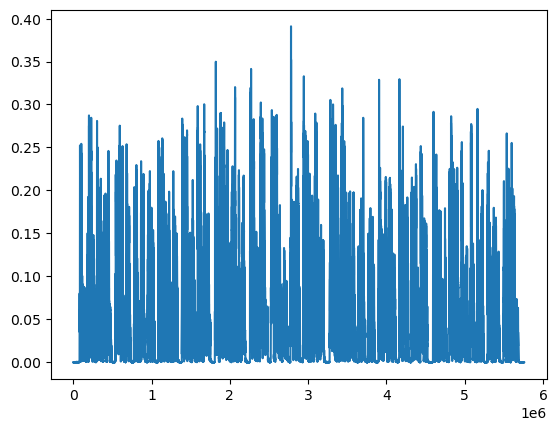

In [14]:
plt.plot(env)

In [25]:
for band in Y:

    print(band.shape)

(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)
(1, 5760000)


In [ ]:
plt.plot(channels)

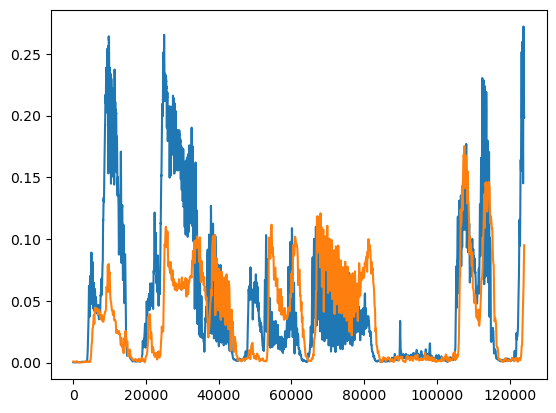

In [8]:
tstart = 76000
tstop = 200000
plt.plot(input_env[tstart:tstop])
plt.plot(OE_env[tstart:tstop])


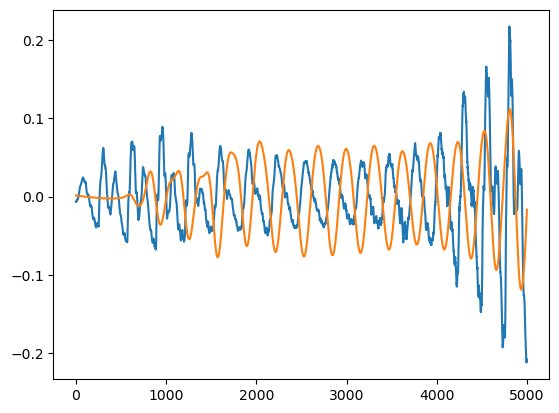

In [25]:
tstart = 80000
tstop = 85000
#plt.plot(DRC_env)
plt.plot(data[tstart:tstop])
plt.plot(OE_norm[tstart:tstop])


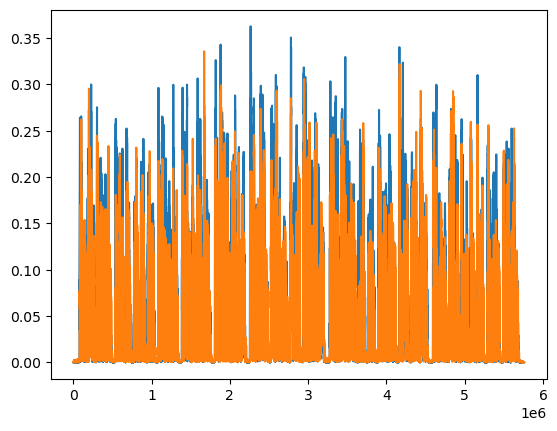

In [21]:
plt.plot(input_env)
plt.plot(OE_env)
#plt.plot(DRC_env)

In [170]:
np.log(np.logspace(0.0, 375))+375

array([ 375.        ,  392.62182469,  410.24364938,  427.86547407,
        445.48729877,  463.10912346,  480.73094815,  498.35277284,
        515.97459753,  533.59642222,  551.21824691,  568.8400716 ,
        586.4618963 ,  604.08372099,  621.70554568,  639.32737037,
        656.94919506,  674.57101975,  692.19284444,  709.81466913,
        727.43649383,  745.05831852,  762.68014321,  780.3019679 ,
        797.92379259,  815.54561728,  833.16744197,  850.78926666,
        868.41109136,  886.03291605,  903.65474074,  921.27656543,
        938.89839012,  956.52021481,  974.1420395 ,  991.76386419,
       1009.38568889, 1027.00751358, 1044.62933827, 1062.25116296,
       1079.87298765,           inf,           inf,           inf,
                 inf,           inf,           inf,           inf,
                 inf,           inf])

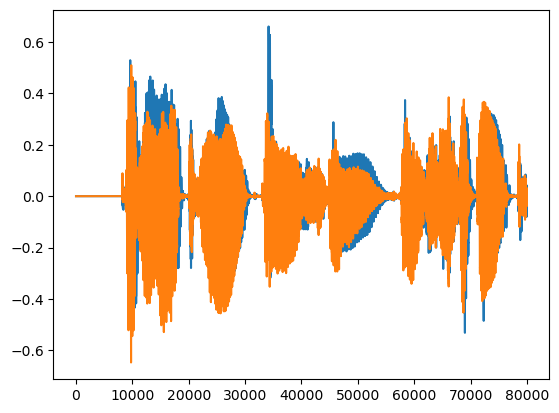

In [59]:
tstart = 80000
tstop = 160000
plt.plot(OE_norm[tstart:tstop])
plt.plot(data[tstart:tstop])

#plt.plot(DRC_norm[tstart:tstop])
#plt.plot(MSE_env[tstart:tstop])

In [66]:
import numpy as np
from scipy.signal import lfilter

def Hz_to_ERB(f):
    """
    Convert frequency in Hz to ERB number
    """
    return 21.4 * np.log10(4.37 * f / 1000 +1)

def ERB_to_Hz(erb_num):
    """
    Convert ERB number to frequency in Hz
    """

    return (10**(erb_num / 21.4) - 1) * 1000 / 4.37

def ERB_cf(f_low, f_high, n):

    """
    Calculate n centre frequencies linearly spaced along ERB scale within range (f_low, f_high)

    Parameters:
    f_low   (float):    lower bound of frequency range (Hz)
    f_high  (float):    upper bound of frequency range (Hz)
    n       (int):      number of centre frequencies to calculate

    Returns:
    cf      (list):     list of n centre frequencies linearly spaced on ERB scale in given range
    """

    erb_low = Hz_to_ERB(f_low)
    erb_high = Hz_to_ERB(f_high)
    erb_cf = np.linspace(erb_low, erb_high, n)
    cf = [ERB_to_Hz(erb) for erb in erb_cf]

    return cf

def ERB_x_over(cf):
    """
    Calculate crossover frequencies based on ERB scale.

    Parameters:
    - cf: List of center frequencies in Hz, spaced on the ERB scale

    Returns:
    - List of crossover frequencies in Hz
    """
    erb_numbers = [Hz_to_ERB(f) for f in cf]
    erb_crossovers = [(erb_numbers[i] + erb_numbers[i+1]) / 2 for i in range(len(erb_numbers) - 1)]
    crossover_freqs = [ERB_to_Hz(erb) for erb in erb_crossovers]
    return crossover_freqs



In [93]:
f_low = 75
f_high = 8500
n = 22

cf = ERB_cf(f_low, f_high, n)
x_over_freqs = ERB_x_over(cf)
erb_numbers = [Hz_to_ERB(f) for f in cf]
erb_crossovers = [(erb_numbers[i] + erb_numbers[i+1]) / 2 for i in range(len(erb_numbers) - 1)]

In [6]:

plt.plot(x_over_freqs, range(len(x_over_freqs)))

NameError: name 'x_over_freqs' is not defined